In [14]:
'''importing necessary libraries'''
import numpy as np 
import scipy 
import matplotlib.pyplot as plt
from numpy.random import rand

# Triangular Lattice
Run the code in order 

In [15]:
#Variables
J = 1
n = 16
t_iters = 3000
c_iters = 3000
t_pts = 200
norm = 1.0/(c_iters*n*n)
norm2 = 1.0/(c_iters**2 * n**2)
Temperatures = np.linspace(0.5, 7, t_pts)
E,M,C,X = np.zeros(t_pts), np.zeros(t_pts), np.zeros(t_pts), np.zeros(t_pts)


In [16]:
def lattice_init(n):
    '''Initialising the lattice'''
    lattice = np.random.choice([-1, 1], size=(n,n))
    return lattice

def change_state(arr):
    '''flip one random lattice point'''
    i = np.random.randint(0, arr.shape[0])
    j = np.random.randint(0, arr.shape[1])
    arr[i, j] *= -1
    return arr

def energy_calc(arr, J):
    '''numpy.roll() is a function which shifts an array by 
        one row or column with the last one replacing the first. 
        This is used to get the periodic boundary condition'''
    energy = J*np.sum(
        arr * (
            np.roll(arr, shift=1, axis=0) +
            np.roll(arr, shift=-1, axis=0) +
            np.roll(arr, shift=1, axis=1) +
            np.roll(arr, shift=-1, axis=1) + 
            np.roll(arr, shift=[1, 1], axis=(0,1)) +
            np.roll(arr, shift=[-1, -1], axis=(0,1))
        )
    )
    return energy

def mag_calc(arr):
    '''Calculate magnetization'''
    mag = np.sum(arr)
    return mag

In [17]:
def thermalisation(lattice, iters, no_flips, beta, J):
    '''This function is used to attain a 
    equilibrium state before beginning calculations'''
    E = energy_calc(lattice, J)
    for i in range(iters):
        a = lattice.copy()
        for k in range(no_flips):
            new_state = change_state(a)
        new_E = energy_calc(new_state, J)
        if new_E - E < 0:
            lattice = new_state
            E = new_E
        elif rand() < np.exp((E-new_E) * beta):
            lattice = new_state
            E = new_E
    return lattice

# Antiferromagnetic Coupling, J = 1

In [18]:
J_ = 1
E_,M_,C_,X_ = np.zeros(t_pts), np.zeros(t_pts), np.zeros(t_pts), np.zeros(t_pts)

In [19]:
def calculation_anti(lattice, beta):    
    '''Calculations after equilibrium. Each spin is 
    given a probability of change here'''
    for t in range(n*n):
        a = np.random.randint(0, n)
        b = np.random.randint(0, n)
        s =  lattice[a, b]
        neighbours = (lattice[(a+1)%n,b] + 
                    lattice[a,(b+1)%n] +
                    lattice[(a-1)%n,b] + 
                    lattice[a,(b-1)%n] +
                    lattice[(a+1)%n, (b+1)%n] + 
                    lattice[(a-1)%n, (b-1)%n]
        )
        prob = -2*s*neighbours
        if prob < 0:
            s *= -1
        elif rand() < np.exp(-prob*beta):
            s *= -1
        lattice[a, b] = s
    return lattice

In [20]:
'''Main Loop for antiferromagnetic loop'''
for t in range(t_pts):
    E1 = 0.
    E2 = 0.
    M1 = 0.
    M2 = 0.
    init_lattice = lattice_init(n)
    beta = 1.0/Temperatures[t]
    lattice = thermalisation(init_lattice, t_iters, n*n, beta, J_)
    for i in range(c_iters):
        lattice = calculation_anti(lattice, beta)
        energy = energy_calc(lattice, J_)
        mag = mag_calc(lattice)
        
        E1 += energy
        M1 += mag
        E2 += energy*energy
        M2 += mag*mag
    
    E_[t] = E1*norm
    M_[t] = M1*norm
    C_[t] = (E2*norm - E1*E1*norm2) * beta**2
    X_[t] = (M2*norm - M1*M1*norm2) * beta

(np.float64(0.175),
 np.float64(7.325),
 np.float64(0.05924130803566689),
 np.float64(0.3200548120512116))

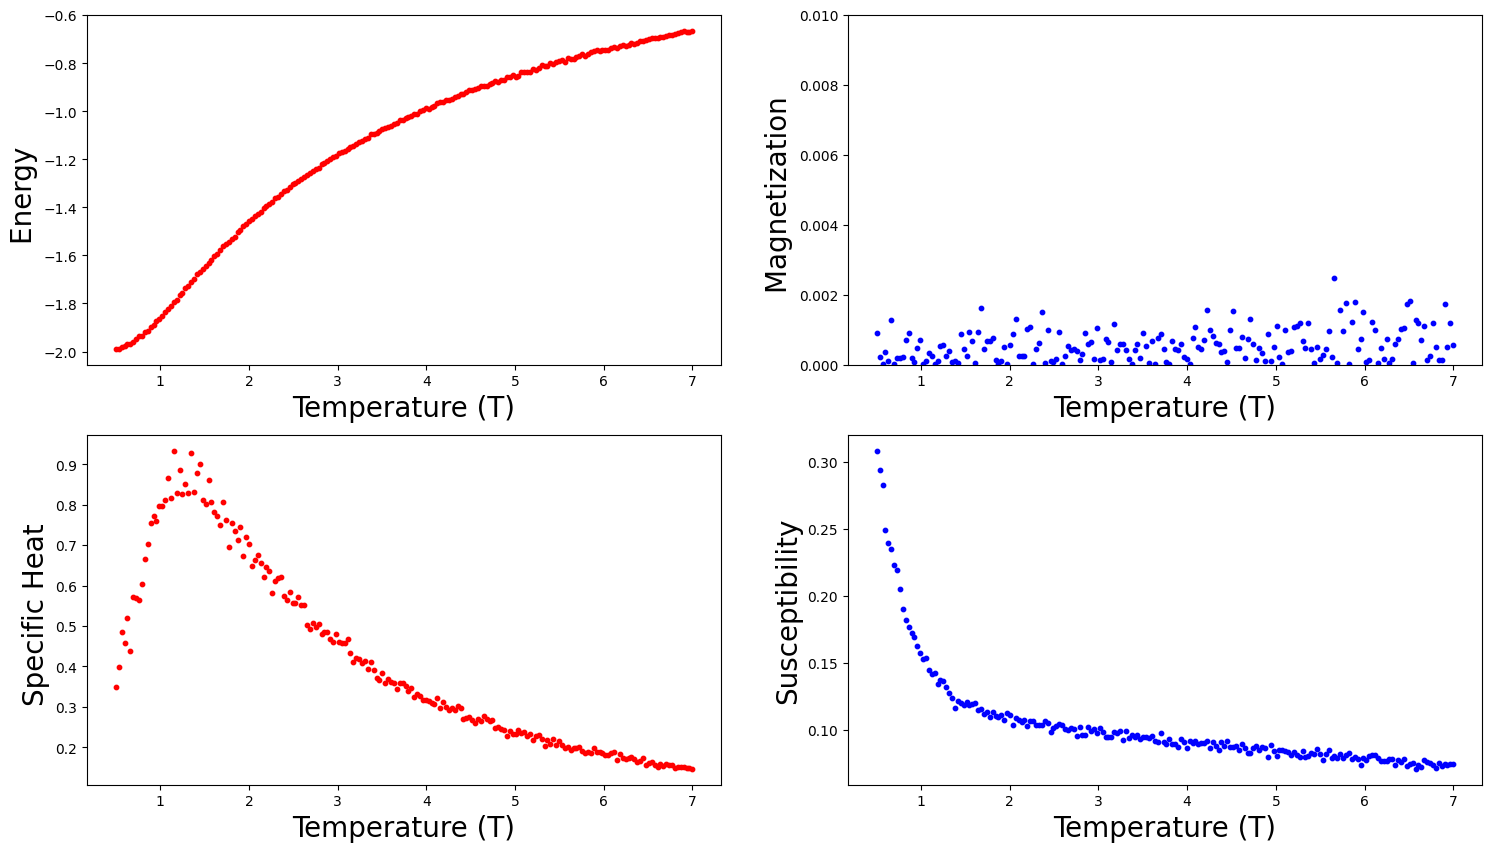

In [21]:
#Plotting
fig = plt.figure(figsize=(18, 10)); 

ax =  fig.add_subplot(2, 2, 1 )
plt.scatter(Temperatures, E_, s=10, marker='o', color='Red')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Energy ", fontsize=20)
plt.axis('tight')

ax =  fig.add_subplot(2, 2, 2 )
plt.scatter(Temperatures, abs(M_), s=10, marker='o', color='Blue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Magnetization ", fontsize=20)
plt.axis('tight')
plt.ylim(0, 0.01)

ax =  fig.add_subplot(2, 2, 3 )
plt.scatter(Temperatures, C_, s=10, marker='o', color='Red')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Specific Heat ", fontsize=20)   
plt.axis('tight')  

ax =  fig.add_subplot(2, 2, 4 )
plt.scatter(Temperatures, X_, s=10, marker='o', color='Blue')
plt.xlabel("Temperature (T)", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)   
plt.axis('tight')